# 🧠 10 - Error Analysis: Bias vs Variance Trade-off

Understanding the sources of error helps us build better models. We'll explore:

- What are Bias, Variance, and Irreducible Error?
- Bias-Variance Tradeoff
- Visual Simulation of Underfitting and Overfitting

## Step 1: Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Step 2: Create Complex True Function

In [2]:
def true_function(X):
    return np.sin(1.5 * X)

np.random.seed(42)
X = np.sort(np.random.rand(100) * 10)
y = true_function(X) + np.random.normal(0, 0.3, size=X.shape)

## Step 3: Simulate Different Models (Low vs High Complexity)

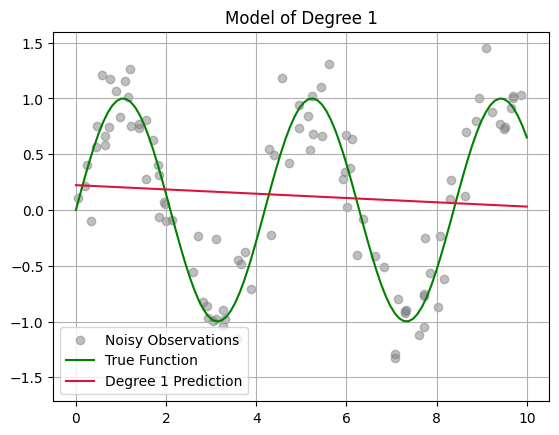

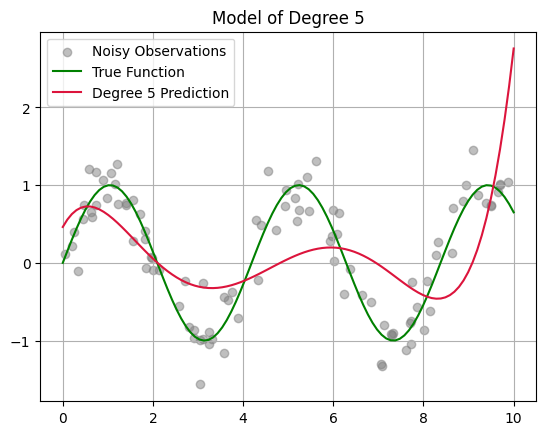

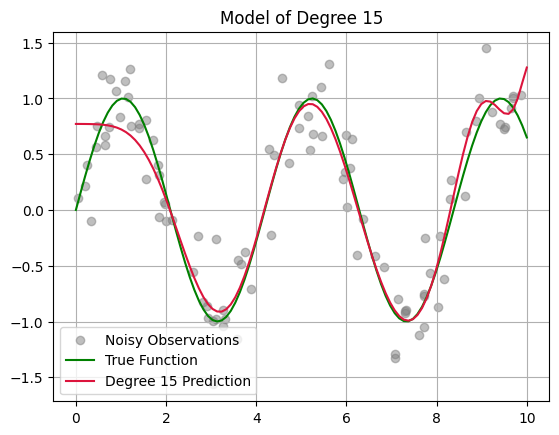

In [3]:
def plot_model(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.scatter(X, y, label="Noisy Observations", color='gray', alpha=0.5)
    X_line = np.linspace(0, 10, 100)
    y_line = model.predict(poly.transform(X_line.reshape(-1, 1)))
    
    plt.plot(X_line, true_function(X_line), color="green", label="True Function")
    plt.plot(X_line, y_line, color="crimson", label=f"Degree {degree} Prediction")
    
    plt.title(f"Model of Degree {degree}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model(1)   # Underfit: High Bias
plot_model(5)   # Balanced
plot_model(15)  # Overfit: High Variance

## 📌 Observations

- **Degree 1**: Too simple → High Bias, Low Variance → Underfitting
- **Degree 15**: Too complex → Low Bias, High Variance → Overfitting
- **Degree 5**: Balanced Model

## Step 4: Bias-Variance Intuition Plot

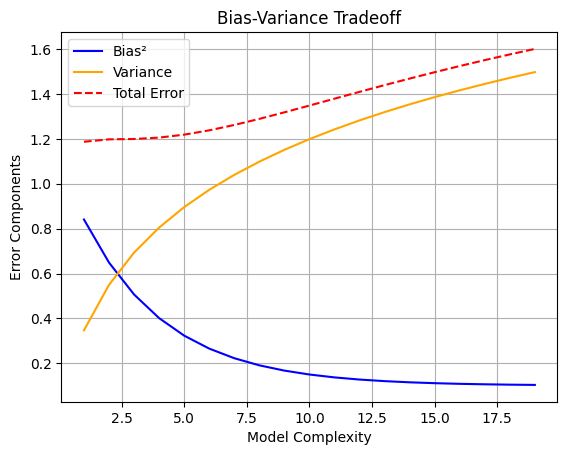

In [4]:
x = np.arange(1, 20)
bias = np.exp(-0.3 * x) + 0.1
variance = np.log(x + 1) * 0.5
error = bias + variance

plt.plot(x, bias, label="Bias²", color="blue")
plt.plot(x, variance, label="Variance", color="orange")
plt.plot(x, error, label="Total Error", color="red", linestyle="--")
plt.xlabel("Model Complexity")
plt.ylabel("Error Components")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

## 🔍 Summary

- Total Error = Bias² + Variance + Irreducible Noise
- There's a **sweet spot** in model complexity where total error is minimized.
- **Simple models** have high bias, low variance.
- **Complex models** have low bias, high variance.
- Good generalization comes from balance, not extremes.